In [1]:
from runSpatialSimulation_v3 import *
from spatial_yeast_model_carryingcapactiyfixed_v4 import *
from xor_gate_implementation import *

In [8]:
def quick_two_strain_relay():
    strain_library = create_strain_library()
    
    # Create smaller model
    model = SpatialMultiStrainModel(grid_size=(10, 10), dx=1)
    
    # Add strains
    model.add_strain(strain_library['beta->alpha'])  # Sender
    model.add_strain(strain_library['alpha->venus']) # Receiver
    
    # Place sender strain on the left
    model.place_strain(0, 5, 5, radius=2, concentration=10.0)
    
    # Place receiver strain on the right
    model.place_strain(1, 5, 5, radius=2, concentration=10.0)
    
    # Place beta-estradiol input
    model.place_molecule(BETA, 5, 5, radius=5, concentration=100.0)
    
    # Set shorter simulation time
    model.set_simulation_time(0, 24)
    
    # Run simulation with fewer time points
    results = model.simulate(n_time_points=10, competition = True)
    
    # Plot just the final state
    model.plot_spatial_results(results, time_idx=-1, molecules=[ALPHA, BETA, VENUS])
    gfp_anim = model.create_animation(results, molecule=VENUS, 
                                       interval=100, cmap='viridis')
    gfp_anim.save('venus_alphatwostrain_test.gif', writer='ffmpeg', fps=5)
    alpha_anim = model.create_animation(results, molecule=ALPHA, 
                                       interval=100, cmap='viridis')
    alpha_anim.save('alpha_alphatwostrain_test.gif', writer='ffmpeg', fps=5)
    beta_anim = model.create_animation(results, molecule=BETA, 
                                       interval=100, cmap='viridis')
    beta_anim.save('beta_alphatwostrain_test.gif', writer='ffmpeg', fps=5)

    return results, model

Starting spatial simulation with 2 strains...
Using model with strain competition for carrying capacity
Simulation completed in 18.73 seconds


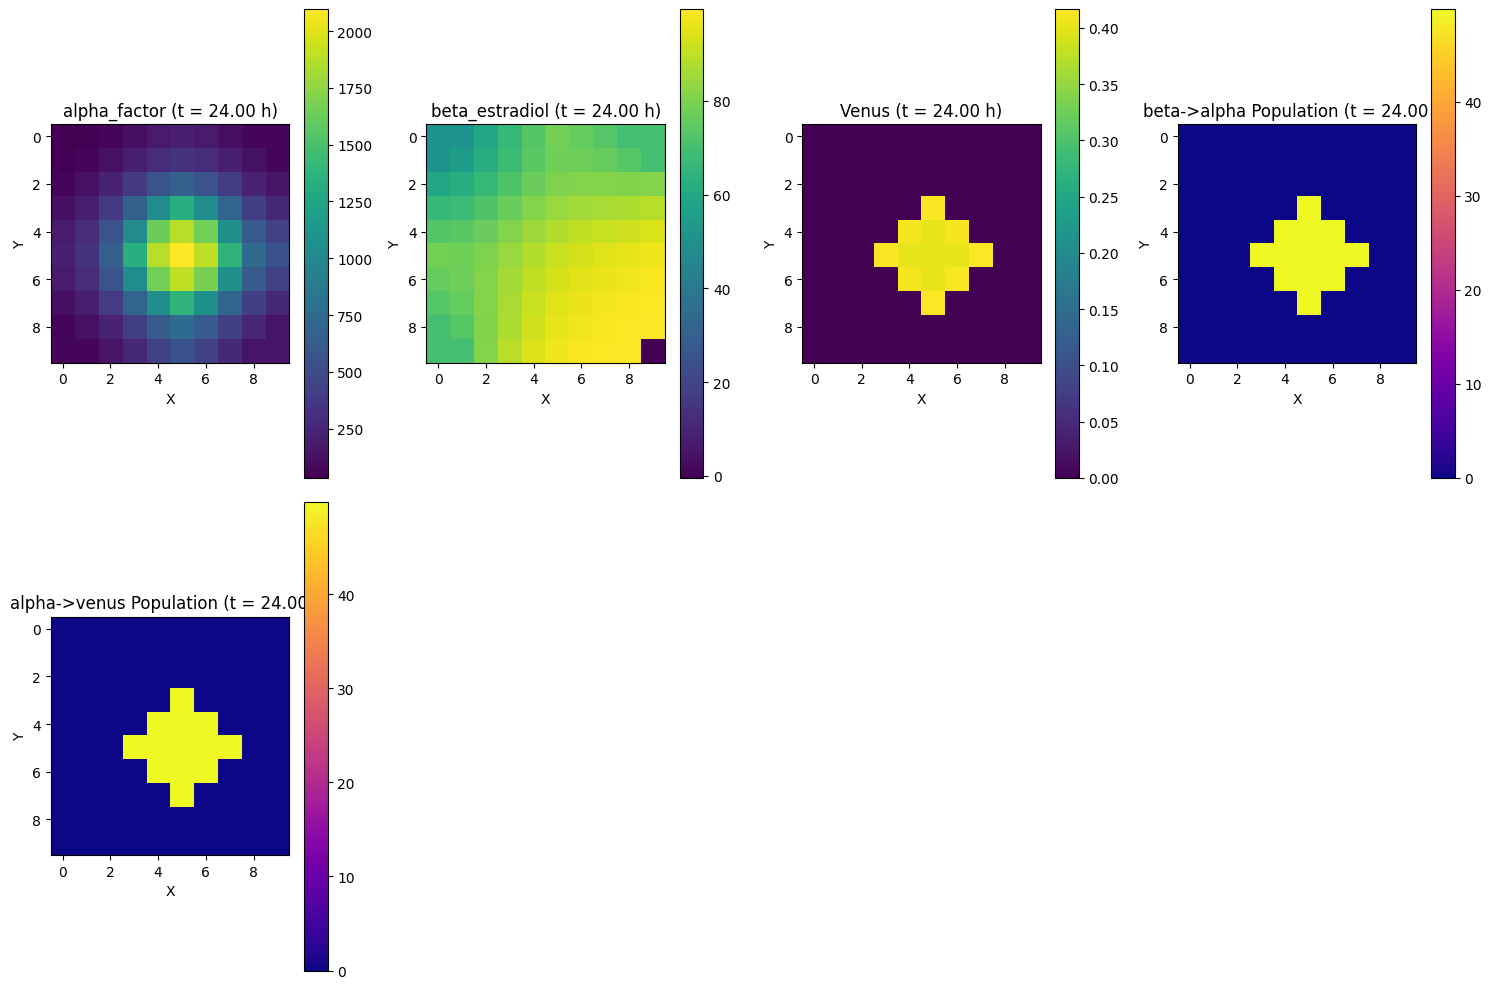

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


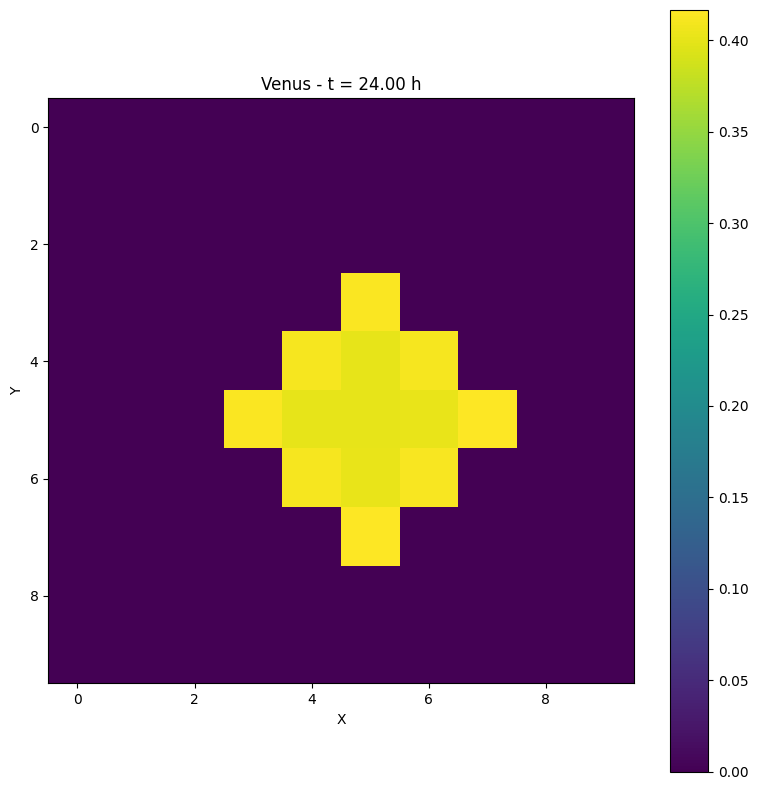

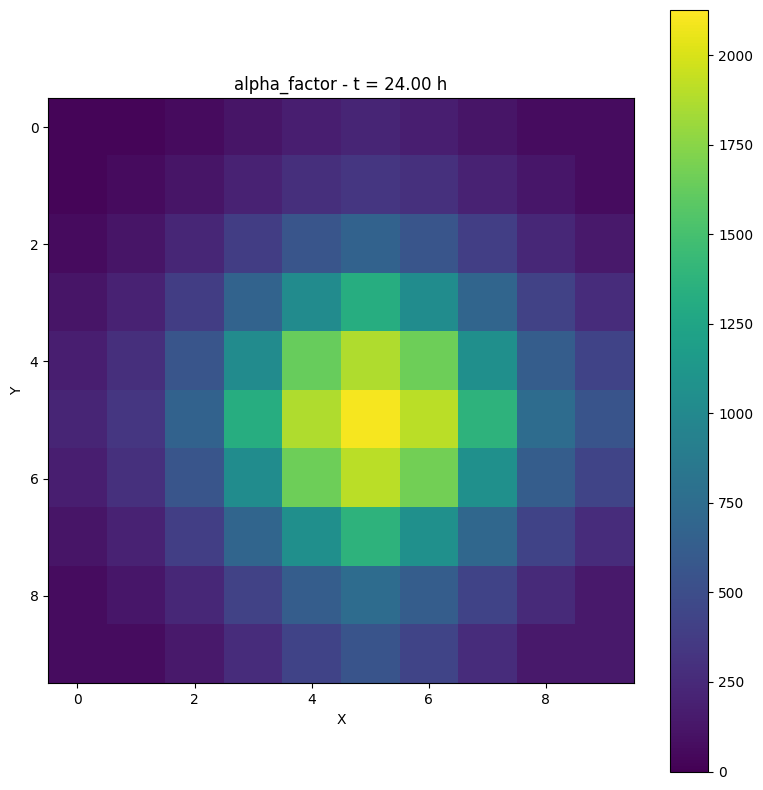

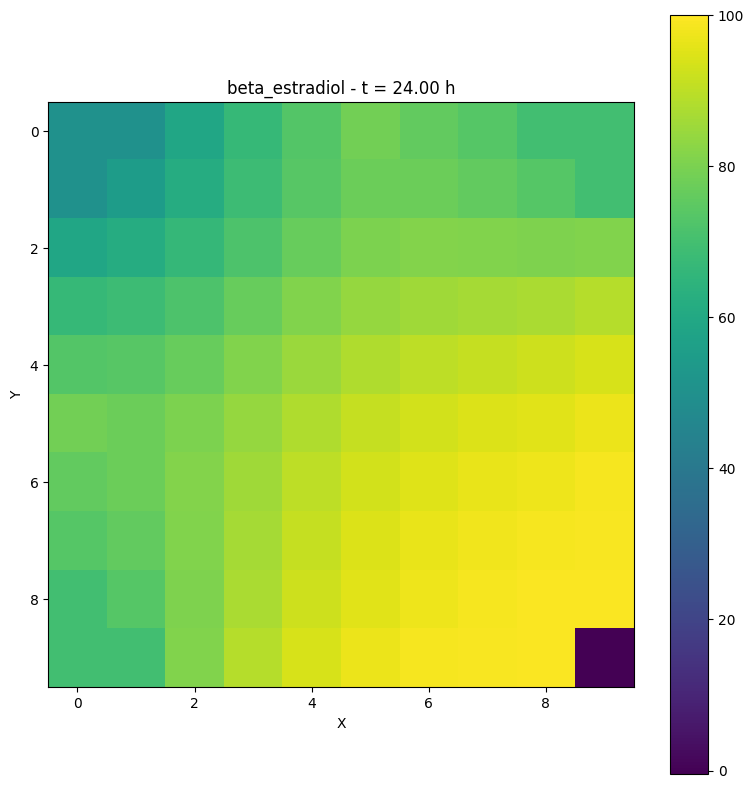

In [9]:
resultsnocomp, modelnocomp = quick_two_strain_relay()

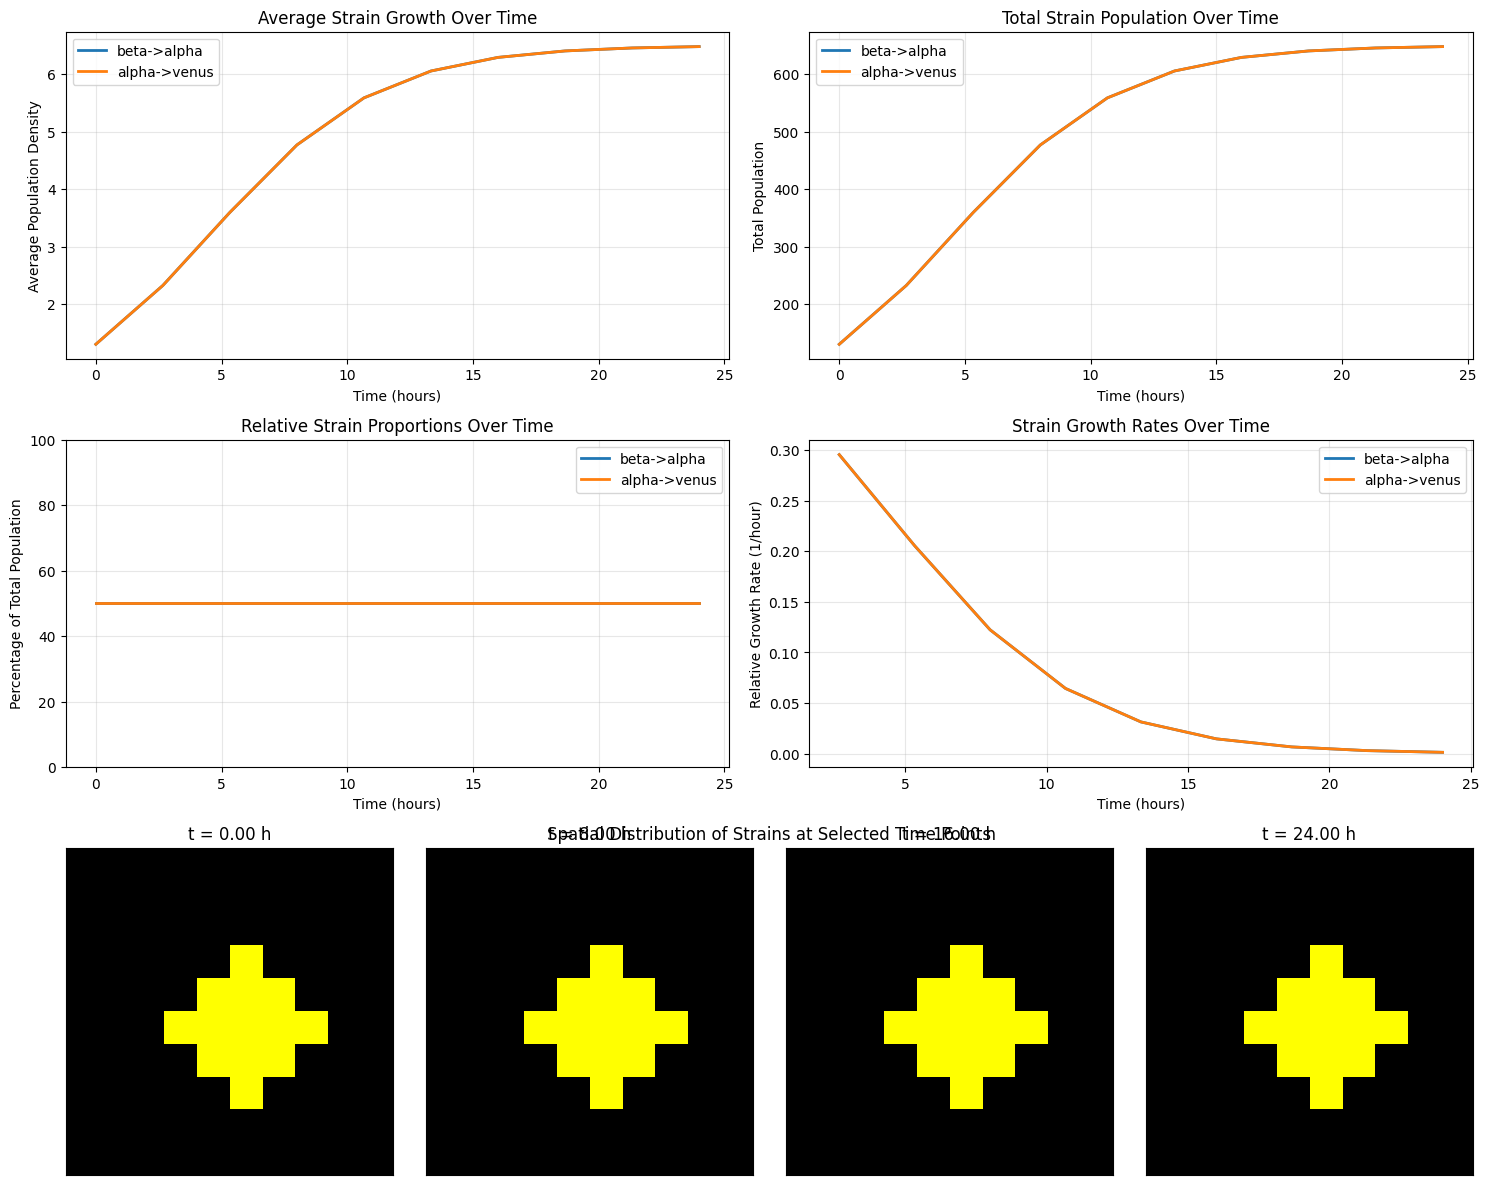

In [10]:
fig = create_growth_dashboard(resultsnocomp, modelnocomp)

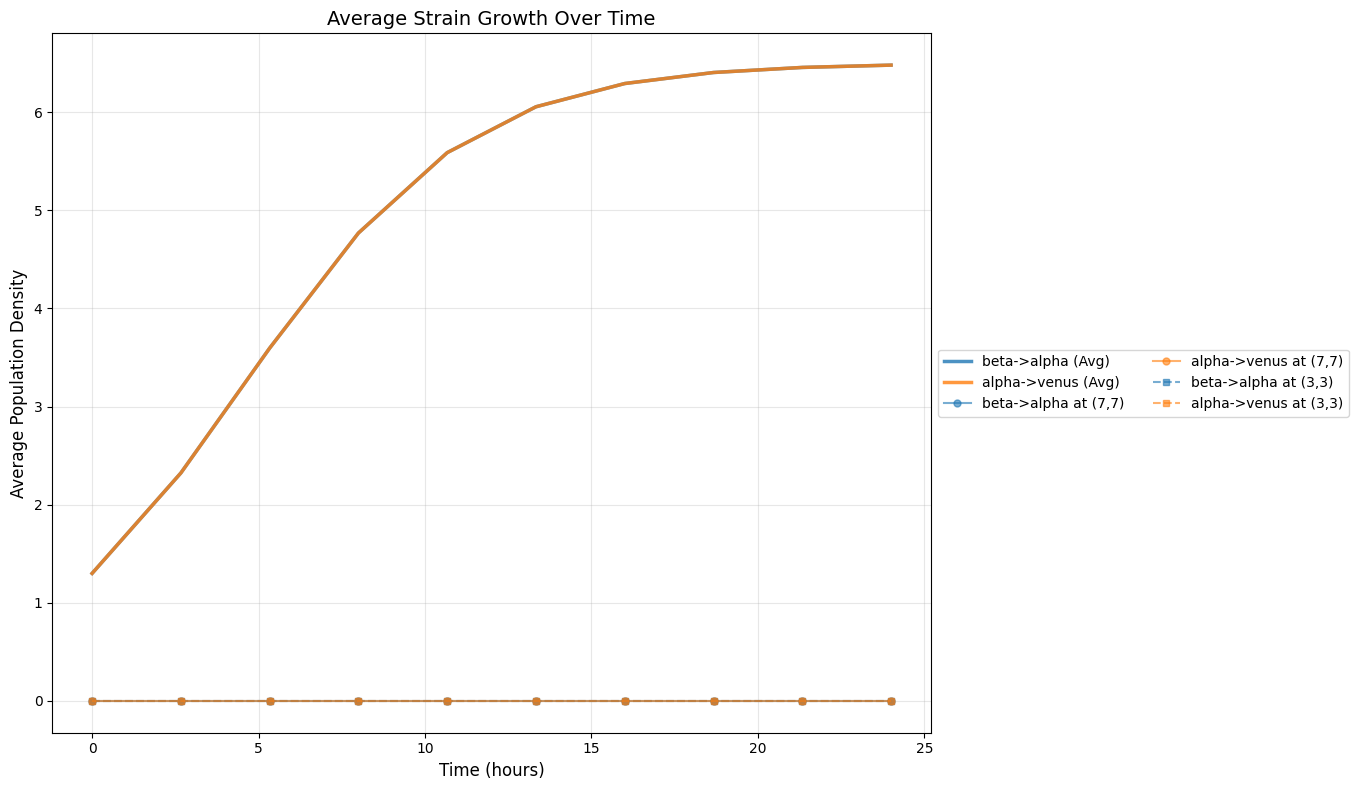

In [11]:
fig = plot_strain_growth(resultsnocomp, modelnocomp, specific_locations=[(7, 7), (3, 3)])  # With specific locations